# Relation Viewer Prototype
Purpose: Explore options for viewing relations

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath("../.."))  # Repository directory relative to this file.
from MISalign.model.relation import Relation

# Initial Prototyping

In [2]:
#setup test data 1
#basic split data set 
image_fps=['img_a','img_b','img_c','img_d','img_e','img_f']
rel1=[
    Relation('img_a','img_b'),
    Relation('img_b','img_c'),
    Relation('img_c','img_d'),
    Relation('img_a','img_e'),
    Relation('img_e','img_f')
]
display([x.ref for x in rel1])

[('img_a', 'img_b'),
 ('img_b', 'img_c'),
 ('img_c', 'img_d'),
 ('img_a', 'img_e'),
 ('img_e', 'img_f')]

In [9]:
%pip install networkx[default]

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ------- -------------------------------- 0.4/2.1 MB 11.6 MB/s eta 0:00:01
     -------------- ------------------------- 0.8/2.1 MB 9.7 MB/s eta 0:00:01
     ------------------------- -------------- 1.3/2.1 MB 10.5 MB/s eta 0:00:01
     -------------------------------------- - 2.0/2.1 MB 11.4 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 11.0 MB/s eta 0:00:00
  Obtaining dependency information for scipy>=1.8 from https://files.pythonhosted.org/packages/3a/98/3041681b3a0fef0f59033861a05d846aa1d284b07b531ce35b1b97cc2e93/scipy-1.11.3-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB ? eta 0:00:00
  Obtaining dependency information for matplotlib>=3.4 from https://files.pythonhosted.org/packages/7a/94/a1615bac6706eb8a58fe08675b80a11b5463ef9591176dd3e57257495774/matplotlib-3.

In [3]:
import networkx as nx
G = nx.Graph()

In [5]:
G.add_nodes_from(image_fps)

In [4]:
H=nx.Graph()
H.add_edges_from([x.ref for x in rel1])

In [7]:
display(G.nodes)
display(G.edges)
display(G.adj)
display(G.degree)

NodeView(('img_a', 'img_b', 'img_c', 'img_d', 'img_e', 'img_f'))

EdgeView([])

AdjacencyView({'img_a': {}, 'img_b': {}, 'img_c': {}, 'img_d': {}, 'img_e': {}, 'img_f': {}})

DegreeView({'img_a': 0, 'img_b': 0, 'img_c': 0, 'img_d': 0, 'img_e': 0, 'img_f': 0})

In [6]:
display(H.nodes)
display(H.edges)
display(H.adj)
display(H.degree)

NodeView(('img_a', 'img_b', 'img_c', 'img_d', 'img_e', 'img_f'))

EdgeView([('img_a', 'img_b'), ('img_a', 'img_e'), ('img_b', 'img_c'), ('img_c', 'img_d'), ('img_e', 'img_f')])

AdjacencyView({'img_a': {'img_b': {}, 'img_e': {}}, 'img_b': {'img_a': {}, 'img_c': {}}, 'img_c': {'img_b': {}, 'img_d': {}}, 'img_d': {'img_c': {}}, 'img_e': {'img_a': {}, 'img_f': {}}, 'img_f': {'img_e': {}}})

DegreeView({'img_a': 2, 'img_b': 2, 'img_c': 2, 'img_d': 1, 'img_e': 2, 'img_f': 1})

In [9]:
L=nx.Graph([x.ref for x in rel1])
display(L.nodes)
display(L.edges)
display(L.adj)
display(L.degree)

NodeView(('img_a', 'img_b', 'img_c', 'img_d', 'img_e', 'img_f'))

EdgeView([('img_a', 'img_b'), ('img_a', 'img_e'), ('img_b', 'img_c'), ('img_c', 'img_d'), ('img_e', 'img_f')])

AdjacencyView({'img_a': {'img_b': {}, 'img_e': {}}, 'img_b': {'img_a': {}, 'img_c': {}}, 'img_c': {'img_b': {}, 'img_d': {}}, 'img_d': {'img_c': {}}, 'img_e': {'img_a': {}, 'img_f': {}}, 'img_f': {'img_e': {}}})

DegreeView({'img_a': 2, 'img_b': 2, 'img_c': 2, 'img_d': 1, 'img_e': 2, 'img_f': 1})

In [10]:
G.add_edge(rel1[0].ref[0],rel1[0].ref[1],object=rel1[0])
#give object to edge!

In [34]:
H.add_edge("img_c","img_g")
H.add_edge("img_g","img_h")
H.add_node("img_a",color='red')

In [15]:
h_color=['b']*len(H.nodes)
h_color[0]='g'

{'img_a': array([0, 0]),
 'img_b': array([-1, -1]),
 'img_c': array([-1, -2]),
 'img_d': array([-1, -3]),
 'img_e': array([ 1, -1]),
 'img_f': array([ 1, -2])}

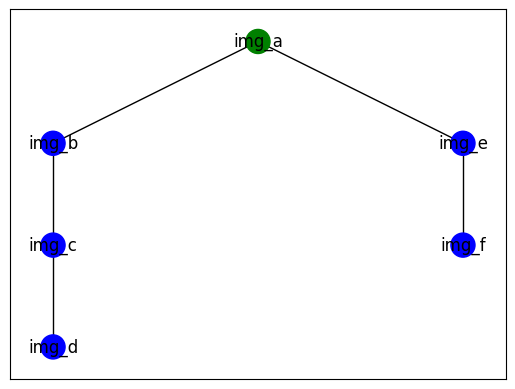

In [23]:
import numpy as np

lay=nx.drawing.planar_layout(H)
lay['img_a']=np.array([0,0])
lay['img_b']=np.array([-1,-1])
lay['img_c']=np.array([-1,-2])
lay['img_d']=np.array([-1,-3])
lay['img_e']=np.array([1,-1])
lay['img_f']=np.array([1,-2])
nx.draw_networkx(H,node_color=h_color,pos=lay)
display(lay)

In [66]:
a1 = {'a':1, 'b':13, 'd':4, 'c':2, 'e':30}
a1_sorted_keys = sorted(a1, key=a1.get, reverse=True)
for r in a1_sorted_keys:
    print(r, a1[r])

e 30
b 13
d 4
c 2
a 1


In [70]:
nodes=list(H.nodes)
start='img_a'
adj={x:list(H.adj[x]) for x in H.adj}
adj_count={x:len(H.adj[x]) for x in H.adj}
chains=np.sum(np.asarray(list(adj_count.values()))<=1)
display(adj)
display(adj_count)
print("Chains:",chains)
v_spacing_dict=nx.shortest_path_length(H,None,start)
display(v_spacing_dict)
ordering=sorted(v_spacing_dict,key=v_spacing_dict.get,reverse=True)
h_spacing_dict={}
display(ordering)
# i=0
# for item in ordering:
#     if item==start:
#         h_spacing_dict[item]=0
#     if adj_count[item]<=2: #find children in linear chain and set them to have the same h-spacing
#         for x in adj[item]:
#             if x not in h_spacing_dict:
#                 h_spacing_dict[x]=h_spacing_dict[item]
#     else:
#         #deal with splitting?
#         pass
# display(h_spacing_dict)

{'img_a': ['img_b', 'img_e'],
 'img_b': ['img_a', 'img_c'],
 'img_c': ['img_b', 'img_d'],
 'img_d': ['img_c'],
 'img_e': ['img_a', 'img_f'],
 'img_f': ['img_e']}

{'img_a': 2, 'img_b': 2, 'img_c': 2, 'img_d': 1, 'img_e': 2, 'img_f': 1}

Chains: 2


{'img_a': 0, 'img_b': 1, 'img_e': 1, 'img_c': 2, 'img_f': 2, 'img_d': 3}

['img_a', 'img_b', 'img_e', 'img_c', 'img_f', 'img_d']

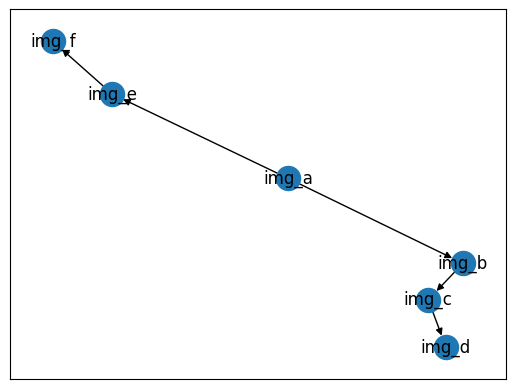

In [89]:
[x for x in nx.chain_decomposition(H,root=start)]

nx.draw_networkx(nx.bfs_tree(H,'img_a'))

# Prototyping part 2

In [37]:
import networkx as nx
import numpy as np

[('img_a', 'img_b'),
 ('img_b', 'img_c'),
 ('img_c', 'img_d'),
 ('img_a', 'img_aa'),
 ('img_aa', 'img_ab'),
 ('img_ab', 'img_ac'),
 ('img_b', 'img_ba'),
 ('img_ba', 'img_bb'),
 ('img_bb', 'img_bc'),
 ('img_c', 'img_ca'),
 ('img_ca', 'img_cb'),
 ('img_cb', 'img_cc'),
 ('img_d', 'img_da'),
 ('img_da', 'img_db'),
 ('img_da', 'img_de'),
 ('img_de', 'img_df'),
 ('img_de', 'img_dg'),
 ('img_db', 'img_dc')]

NodeView(('img_a', 'img_b', 'img_aa', 'img_c', 'img_ba', 'img_ab', 'img_d', 'img_ca', 'img_bb', 'img_ac', 'img_da', 'img_cb', 'img_bc', 'img_db', 'img_de', 'img_cc', 'img_dc', 'img_df', 'img_dg'))

{'img_a': array([-0.98159509, -5.2208589 ]),
 'img_b': array([ 1.       , -5.2208589]),
 'img_aa': array([-0.63190184, -5.10429448]),
 'img_c': array([ 0.53374233, -5.10429448]),
 'img_ba': array([ 0.76687117, -4.98773006]),
 'img_ab': array([-0.74846626, -4.98773006]),
 'img_d': array([ 0.12576687, -5.04601227]),
 'img_ca': array([ 0.35889571, -4.92944785]),
 'img_bb': array([ 0.70858896, -4.92944785]),
 'img_ac': array([-0.80674847, -5.04601227]),
 'img_da': array([ 0.06748466, -4.98773006]),
 'img_cb': array([ 0.3006135 , -4.87116564]),
 'img_bc': array([ 0.59202454, -5.04601227]),
 'img_db': array([-0.3404908 , -4.92944785]),
 'img_de': array([-0.10736196, -4.81288344]),
 'img_cc': array([ 0.18404908, -4.98773006]),
 'img_dc': array([-0.57361963, -5.16257669]),
 'img_df': array([-0.28220859, -4.87116564]),
 'img_dg': array([-0.16564417, -4.75460123])}

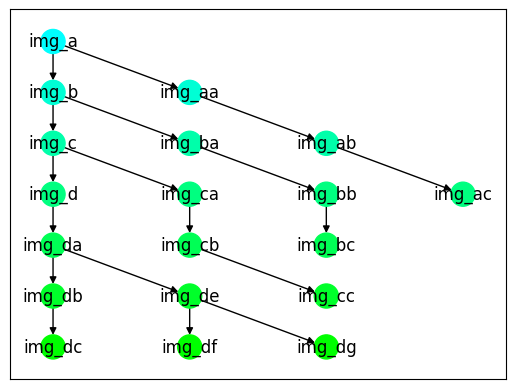

In [66]:
#setup test data 1
#basic split data set 
image_fps=['img_a','img_b','img_c','img_d','img_e','img_f']
rel1=[#'over and down' pattern
    Relation('img_a','img_b'),
    Relation('img_b','img_c'),
    Relation('img_c','img_d'),
    Relation('img_a','img_aa'),
    Relation('img_aa','img_ab'),
    Relation('img_ab','img_ac'),
    Relation('img_b','img_ba'),
    Relation('img_ba','img_bb'),
    Relation('img_bb','img_bc'),
    Relation('img_c','img_ca'),
    Relation('img_ca','img_cb'),
    Relation('img_cb','img_cc'),
    Relation('img_d','img_da'),
    Relation('img_da','img_db'),
    Relation('img_da','img_de'),
    Relation('img_de','img_df'),
    Relation('img_de','img_dg'),
    Relation('img_db','img_dc')
]
display([x.ref for x in rel1])
G=nx.from_edgelist([x.ref for x in rel1])
H=nx.bfs_tree(G,'img_a')
distance=nx.shortest_path_length(H,'img_a')
max_distance=max(distance.values())
colormap=[(0,1,(1-dist/max_distance)) for dist in distance.values()]
display(H.nodes)
pos=nx.planar_layout(H)
pos={x:pos[x]-np.array([0,5]) for x in pos}
display(pos)
pos['img_a']=np.array([0,0])
i=0
j=0
k=0
l=0
m=0
n=0
for img in H.adj['img_a']:
    pos[img]=[i,-1]
    i+=1
    for img_ in H.adj[img]:
        pos[img_]=[j,-2]
        j+=1
        for img__ in H.adj[img_]:
            pos[img__]=[k,-3]
            k+=1
            for img___ in H.adj[img__]:
                pos[img___]=[l,-4]
                l+=1
                for img____ in H.adj[img___]:
                    pos[img____]=[m,-5]
                    m+=1
                    for img_____ in H.adj[img____]:
                        pos[img_____]=[n,-6]
                        n+=1
nx.draw_networkx(H,node_color=colormap,pos=pos)

{0: 0, -1: 2, -2: 3, -3: 4, -4: 3, -5: 3, -6: 3, -7: 0}

{'img_a': array([0, 0]),
 'img_aa': array([ 0, -1]),
 'img_ab': array([ 0, -2]),
 'img_ac': array([ 0, -3]),
 'img_b': array([ 1, -1]),
 'img_ba': array([ 1, -2]),
 'img_bb': array([ 1, -3]),
 'img_bc': array([ 0, -4]),
 'img_c': array([ 2, -2]),
 'img_ca': array([ 2, -3]),
 'img_cb': array([ 1, -4]),
 'img_cc': array([ 0, -5]),
 'img_d': array([ 3, -3]),
 'img_da': array([ 2, -4]),
 'img_db': array([ 1, -5]),
 'img_dc': array([ 0, -6]),
 'img_de': array([ 2, -5]),
 'img_df': array([ 1, -6]),
 'img_dg': array([ 2, -6])}

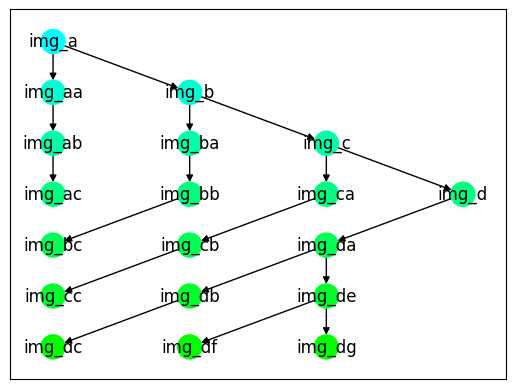

In [67]:
#goal: functionalize that giant for loop
def tree_step(G:nx.digraph,start:str,depth:int=-1,width:dict={0:0},pos:dict=None):
    if pos is None:
        pos={start:np.array([0,0])}
    if depth not in width:
        width[depth]=0
    for img in sorted(G.adj[start]):
        pos[img]=np.array([width[depth],depth])
        pos,width=tree_step(G,img,depth=depth-1,width=width,pos=pos)
        width[depth]+=1
    return pos,width

func_pos,width_dict=tree_step(H,'img_a')
display(width_dict)
display(func_pos)
nx.draw_networkx(H,node_color=colormap,pos=func_pos)

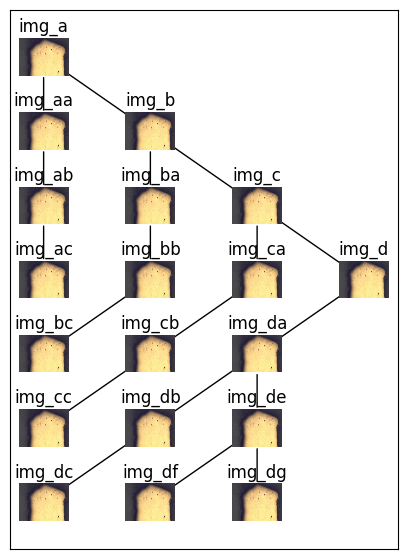

In [133]:
#https://networkx.org/documentation/stable/auto_examples/drawing/plot_custom_node_icons.html#sphx-glr-auto-examples-drawing-plot-custom-node-icons-py
#could use picture as node.
import PIL
from os.path import abspath
img=PIL.Image.open(abspath(r"..\..\example\data\set_a\a_myimages01.jpg"))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
f_pos={x:i*np.array([1,2]) for x,i in func_pos.items()}
fig.set_figheight(6+1)
fig.set_figwidth(4+1)
nx.draw_networkx_edges(
    G,
    pos=f_pos,
    ax=ax,
    arrows=True,
    arrowstyle="-",
    min_source_margin=15,
    min_target_margin=15,
)
# Transform from data coordinates (scaled between xlim and ylim) to display coordinates
tr_figure = ax.transData.transform
# Transform from display to figure coordinates
tr_axes = fig.transFigure.inverted().transform

# Select the size of the image (relative to the X axis)
icon_size = 0.1#(ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.025
icon_center = icon_size / 2.0

# Add the respective image to each node
for node in H.nodes():
    xf, yf = tr_figure(f_pos[node])
    xa, ya = tr_axes((xf, yf))
    # get overlapped axes and plot icon
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(img)
    a.axis("off")


nx.draw_networkx_labels(H,pos={x:i+np.array([0,0.8]) for x,i in f_pos.items()},ax=ax)
plt.show()